<h2><b>[개인 과제]</b></h2>

````
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()
````


<h3>Ridge, Lasso, ElasticNet을 사용해 alpha의 값 변화에 따른 MEDV를 예측하는 변수들의 계수 변화를 시각화해보세요.</h3>

[<h3>참고 코드</h3>](https://datascienceschool.net/03%20machine%20learning/06.05%20%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.html)



<br>

**<h3><조건></h3>**

<h3>1. X(독립변수 data)에 Standard Scaler 적용하기 </h3>

<br>

**<h3><참고></h3>**

<h3>Ridge와 Lasso에서 상수항이 축소되지 않는 이유</h3>

[<h3>참고 블로그</h3>](https://rpago.tistory.com/59)


In [1]:
# The normal imports
import numpy as np # efficient numerical computations
import pandas as pd # data structures for data analysis
from numpy.random import randn

# These are the plotting modules adn libraries
import matplotlib as mpl # plotting (both interactive and to files)
import matplotlib.pyplot as plt
import seaborn as sns # extra plot types, elegant and readable plot style

# machine learning algorithms, dataset access
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RANSACRegressor, ElasticNet, Ridge, Lasso

sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [8]:
# 독립 변수, 종속 변수 지정
house_column = house.columns.to_list()
X = house[house_column[0:-1]]
y = house['MEDV']
X.drop(['CHAS','RAD'], axis = 1, inplace = True )

# 정규화(전체 dataset에 대해 Scaling 진행.)
pipe_lr = make_pipeline(StandardScaler(), LinearRegression())
pipe_lr.fit(X, y)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [11]:
# alpha 값에 따른 계수 변화(Ridge)
alpha = np.logspace(-3, 1 , 5)
data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha = a).fit(X, y)
    data.append(pd.Series(np.hstack([ridge.coef_])))

df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.010,0.100,1.000,10.000
0,-0.070100,-0.070082,-0.069920,-0.068890,-0.066830
1,0.039891,0.039907,0.040061,0.041042,0.043200
2,-0.042017,-0.042331,-0.045291,-0.063705,-0.093990
3,-14.570259,-14.487740,-13.711223,-8.927495,-1.991362
4,4.188291,4.188652,4.191888,4.201238,3.995654
5,-0.001876,-0.001949,-0.002632,-0.006757,-0.011029
6,-1.502758,-1.501497,-1.489634,-1.416511,-1.308727
7,0.000832,0.000816,0.000673,-0.000210,-0.001423
8,-0.873723,-0.872845,-0.864588,-0.814049,-0.747425
9,0.008843,0.008848,0.008892,0.009157,0.009379


In [12]:
# alpha 값에 따른 계수 변화(Lasso)
alpha = np.logspace(-3, 1 , 5)
data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha = a).fit(X, y)
    data.append(pd.Series(np.hstack([lasso.coef_])))

df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso 

,0.001,0.010,0.100,1.000,10.000
0,-0.069995,-0.069043,-0.063183,-0.027592,-0.000000
1,0.039952,0.040516,0.042799,0.043497,0.026146
2,-0.043139,-0.053566,-0.090898,-0.035079,-0.000000
3,-14.254903,-11.334504,-0.000000,-0.000000,0.000000
4,4.187632,4.182064,3.988825,1.230766,0.000000
5,-0.002121,-0.004402,-0.010990,0.018729,0.000000
6,-1.497325,-1.447211,-1.217844,-0.693531,-0.000000
7,0.000771,0.000211,-0.002043,-0.003469,-0.009282
8,-0.870267,-0.838281,-0.710683,-0.652850,-0.000000
9,0.008860,0.009012,0.009476,0.007424,0.007496


In [13]:
# alpha 값에 따른 계수 변화(ElasticNet)
alpha = np.logspace(-3, 1 , 5)
data = []
for i, a in enumerate(alpha):
    elasticnet = ElasticNet(alpha = a).fit(X, y)
    data.append(pd.Series(np.hstack([elasticnet.coef_])))

df_elasticnet = pd.DataFrame(data, index=alpha).T
df_elasticnet

,0.001,0.010,0.100,1.000,10.000
0,-0.069630,-0.067784,-0.063470,-0.040905,-0.000000
1,0.040316,0.041943,0.044773,0.046262,0.040935
2,-0.050161,-0.079000,-0.103923,-0.079012,-0.000000
3,-12.426437,-4.981892,-0.000000,-0.000000,0.000000
4,4.195551,4.169951,3.505415,1.035465,0.000000
5,-0.003740,-0.009776,-0.007951,0.020141,0.020067
6,-1.469697,-1.353000,-1.240448,-0.805278,-0.000000
7,0.000434,-0.000938,-0.001774,-0.002459,-0.008950
8,-0.850897,-0.772762,-0.732660,-0.687164,-0.000000
9,0.008964,0.009347,0.009118,0.007230,0.007436


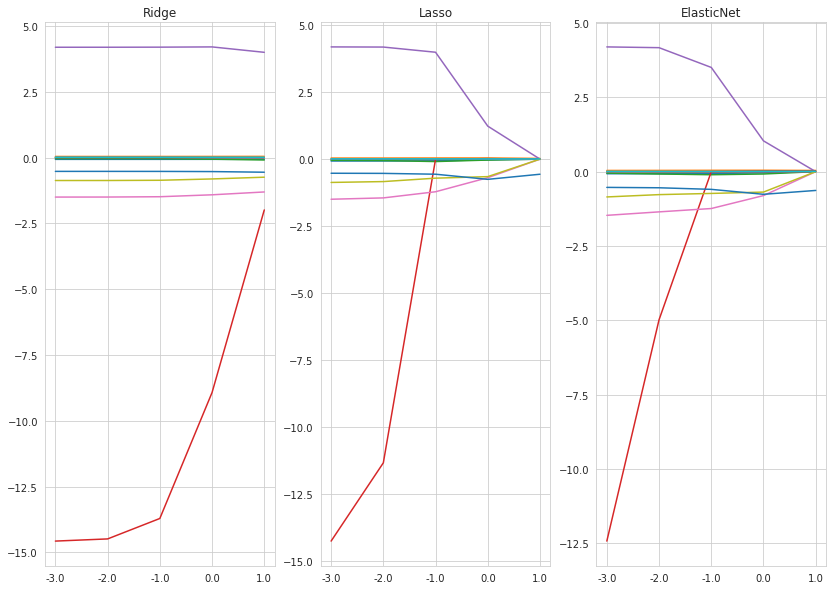

In [14]:
# 시각화
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(131)
plt.semilogx(df_ridge.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Ridge")

ax2 = plt.subplot(132)
plt.semilogx(df_lasso.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("Lasso")

ax3 = plt.subplot(133)
plt.semilogx(df_elasticnet.T)
plt.xticks(alpha, labels=np.log10(alpha))
plt.title("ElasticNet")

plt.show()